In [1]:
!pip install fireducks

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 14.5 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [3]:
import pandas as pd
import numpy as np

# Generating a large synthetic dataset
np.random.seed(42)
data = {
    'A': np.random.rand(1000000),
    'B': np.random.rand(1000000),
    'C': np.random.randint(0, 100, 1000000),
    'D': np.random.choice(['X', 'Y', 'Z'], 1000000)
}
df = pd.DataFrame(data)
# Save dataset to a CSV file
df.to_csv('Data.csv', index=False)

In [4]:
import pandas as pd
import time

# Reading data
start_time = time.time()
df = pd.read_csv('Data.csv')
read_time_pandas = time.time() - start_time

# Groupby operation
start_time = time.time()
grouped_df = df.groupby('D').mean()
groupby_time_pandas = time.time() - start_time

# Descriptive statistics
start_time = time.time()
desc_stats_pandas = df.describe()
desc_time_pandas = time.time() - start_time
read_time_pandas, groupby_time_pandas, desc_time_pandas

(0.6558172702789307, 0.09626984596252441, 0.15510249137878418)

In [6]:
# FireDuck Pandas
import fireducks.pandas as fpd
import time

# Reading data
start_time = time.time()
df_fd = fpd.read_csv('Data.csv')
read_time_fireduck = time.time() - start_time

# Groupby operation
start_time = time.time()
grouped_df_fd = df_fd.groupby('D').mean()
groupby_time_fireduck = time.time() - start_time

# Descriptive statistics
start_time = time.time()
desc_stats_fireduck = df_fd.describe()
desc_time_fireduck = time.time() - start_time
read_time_fireduck, groupby_time_fireduck, desc_time_fireduck

(0.0055522918701171875, 0.007100105285644531, 0.5540475845336914)

In [8]:
!pip install memory_profiler

In [9]:
import pandas as pd
from memory_profiler import memory_usage

# Reading data
mem_usage_pandas = memory_usage((pd.read_csv, ('Data.csv',)))
max_mem_usage_pandas = max(mem_usage_pandas)

# Groupby operation
df = pd.read_csv('Data.csv')
mem_usage_pandas_groupby = memory_usage((df.groupby, ('D',)))
max_mem_usage_pandas_groupby = max(mem_usage_pandas_groupby)

# Descriptive statistics
mem_usage_pandas_desc = memory_usage((df.describe,))
max_mem_usage_pandas_desc = max(mem_usage_pandas_desc)


In [11]:
# print all memory usage
max_mem_usage_pandas , max_mem_usage_pandas_groupby , max_mem_usage_pandas_desc

(373.92578125, 374.09375, 374.1484375)

In [15]:
import fireducks.pandas as fpd
from memory_profiler import memory_usage


# Reading data
mem_usage_fireduck = memory_usage((fpd.read_csv, ('Data.csv',)))
max_mem_usage_fireduck = max(mem_usage_fireduck)

# Groupby operation
df_fd = fpd.read_csv('Data.csv')
mem_usage_fireduck_groupby = memory_usage((df_fd.groupby, ('D',)))
max_mem_usage_fireduck_groupby = max(mem_usage_fireduck_groupby)

# Descriptive statistics
mem_usage_fireduck_desc = memory_usage((df_fd.describe,))
max_mem_usage_fireduck_desc = max(mem_usage_fireduck_desc)

In [16]:
max_mem_usage_fireduck , max_mem_usage_fireduck_groupby , max_mem_usage_fireduck_desc

(374.9609375, 374.9609375, 496.48046875)

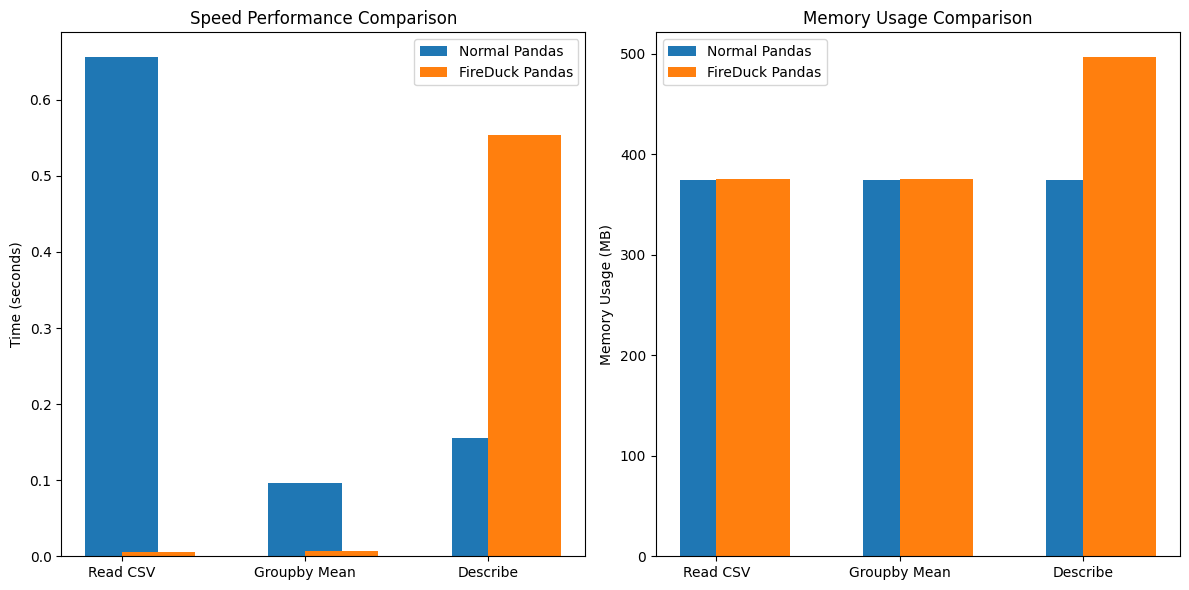

In [17]:
import matplotlib.pyplot as plt

# Performance data
operations = ['Read CSV', 'Groupby Mean', 'Describe']
normal_pandas_times = [read_time_pandas, groupby_time_pandas,
                      desc_time_pandas]
fireduck_pandas_times = [read_time_fireduck, groupby_time_fireduck,
                        desc_time_fireduck]

# Memory usage data
normal_pandas_mem = [max_mem_usage_pandas, max_mem_usage_pandas_groupby,
                     max_mem_usage_pandas_desc]
fireduck_pandas_mem = [max_mem_usage_fireduck, max_mem_usage_fireduck_groupby,
                       max_mem_usage_fireduck_desc]

# Plotting speed performance
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(operations, normal_pandas_times, width=0.4, label='Normal Pandas',
        align='center')
plt.bar(operations, fireduck_pandas_times, width=0.4, label='FireDuck Pandas',
        align='edge')
plt.ylabel('Time (seconds)')
plt.title('Speed Performance Comparison')
plt.legend()

# Plotting memory usage
plt.subplot(1, 2, 2)
plt.bar(operations, normal_pandas_mem, width=0.4, label='Normal Pandas',
        align='center')
plt.bar(operations, fireduck_pandas_mem, width=0.4, label='FireDuck Pandas',
        align='edge')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage Comparison')
plt.legend()

# Displaying the plots
plt.tight_layout()
plt.show()